# USING FacebookProphet MODEL ON SUPER STORE DATA

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime
import plotly.express as px
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

C:\New\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Dataset

In [2]:
df = pd.read_excel(r"C:\Users\This Pc\Desktop\csv\TSFA\Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.shape

(9994, 21)

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.duplicated().any()

False

### Insights
#### data is having 9994 rows
#### shape of data is (9994,21)
#### no missing data
#### no duplicate data is there

## 

### Expand dataset

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [8]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
off_sup = df.loc[df['Category'] == 'Office Supplies']

In [11]:
furniture = df.loc[df['Category'] == 'Furniture']

In [12]:
tech = df.loc[df['Category'] == 'Technology']

In [13]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## EDA 

In [14]:
sub_cat= df.groupby(df['Sub-Category']).count()['Sales']

In [15]:
sub_cat[:20].iplot(kind='bar',xTitle='Sub-Categories',yTitle='Amount of Sales',
                   title='Top 20 sub-Categories by Amount of Sales')

In [16]:
prod= df.groupby(df['Product Name']).count()['Sales']

In [17]:
prod[:20].iplot(kind='bar',xTitle='Prodcuts',yTitle='Amount of Sales',title='Top 20 Product by Amount of Sales')

In [18]:
cat= df.groupby(df['Category']).count()['Sales']
cat

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Sales, dtype: int64

In [19]:
cat.iplot(kind='scatter',xTitle='Categories',yTitle='Amount Sold',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

In [20]:
cat_sales= df.groupby(df['Category']).sum()['Sales'].reset_index()
cat_sales= cat_sales.sort_values('Sales', ascending = False)
cat_sales

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


In [21]:
cat_profit= df.groupby(df['Category']).sum()['Profit'].reset_index()
cat_profit= cat_profit.sort_values('Profit', ascending = False)
cat_profit

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


##  EXPLORE CATEGORIES

## FURNITURE

In [22]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
furniture['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [24]:
furniture['Product Name'].nunique()

380

In [25]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [26]:
furn_sales= furniture.groupby(furniture['Sub-Category']).sum()['Sales'].reset_index()
furn_sales= furn_sales.sort_values('Sales', ascending = False)
furn_sales

,Sub-Category,Sales
1,Chairs,328449.1030
3,Tables,206965.5320
0,Bookcases,114879.9963
2,Furnishings,91705.1640


In [27]:
furn_profit= furniture.groupby(furniture['Sub-Category']).sum()['Profit'].reset_index()
furn_profit= furn_profit.sort_values('Profit', ascending = False)
furn_profit

,Sub-Category,Profit
1,Chairs,26590.1663
2,Furnishings,13059.1436
0,Bookcases,-3472.5560
3,Tables,-17725.4811


## OFFCICE SUPPLIES

In [28]:
off_sup.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [29]:
off_sup['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [30]:
off_sup['Product Name'].unique()

array(['Self-Adhesive Address Labels for Typewriters by Universal',
       "Eldon Fold 'N Roll Cart System", 'Newell 322', ...,
       'Grip Seal Envelopes', 'Eureka Hand Vacuum, Bagless',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

In [31]:
off_sup['Order Date'].min(),off_sup['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [32]:
offc_sales= off_sup.groupby(off_sup['Sub-Category']).sum()['Sales'].reset_index()
offc_sales= offc_sales.sort_values('Sales', ascending = False)
offc_sales

,Sub-Category,Sales
7,Storage,223843.608
2,Binders,203412.733
0,Appliances,107532.161
6,Paper,78479.206
8,Supplies,46673.538
1,Art,27118.792
3,Envelopes,16476.402
5,Labels,12486.312
4,Fasteners,3024.280


In [33]:
offc_profit= off_sup.groupby(off_sup['Sub-Category']).sum()['Profit'].reset_index()
offc_profit= offc_profit.sort_values('Profit', ascending = False)
offc_profit

,Sub-Category,Profit
6,Paper,34053.5693
2,Binders,30221.7633
7,Storage,21278.8264
0,Appliances,18138.0054
3,Envelopes,6964.1767
1,Art,6527.7870
5,Labels,5546.2540
4,Fasteners,949.5182
8,Supplies,-1189.0995


## TECHNOLOGY

In [34]:
tech.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
tech['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

In [36]:
tech['Product Name'].nunique()

412

In [37]:
tech['Order Date'].min(),tech['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [38]:
tech_sale= tech.groupby(tech['Sub-Category']).sum()['Sales'].reset_index()
tech_sale= tech_sale.sort_values('Sales', ascending = False)
tech_sale

,Sub-Category,Sales
3,Phones,330007.054
2,Machines,189238.631
0,Accessories,167380.318
1,Copiers,149528.030


In [39]:
tech_profit= tech.groupby(tech['Sub-Category']).sum()['Profit'].reset_index()
tech_profit= tech_profit.sort_values('Profit', ascending = False)
tech_profit

,Sub-Category,Profit
1,Copiers,55617.8249
3,Phones,44515.7306
0,Accessories,41936.6357
2,Machines,3384.7569


## 

## Predicting sales and profit using FBProphet model

### Forecast sales for all three categories

In [40]:
import prophet

In [41]:
from prophet import Prophet

In [42]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
    'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
off_sup.drop(cols, axis=1, inplace=True)
tech.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
off_sup = off_sup.sort_values('Order Date')
tech = tech.sort_values('Order Date')



furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
off_sup = off_sup.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

In [43]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [44]:
off_sup.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [45]:
tech.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [46]:
furniture = furniture.set_index('Order Date')
off_sup = off_sup.set_index('Order Date')
tech = tech.set_index('Order Date')


y_furniture = furniture['Sales'].resample('MS').mean()
y_off_sup = off_sup['Sales'].resample('MS').mean()
y_tech = tech['Sales'].resample('MS').mean()


furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
off_sup = pd.DataFrame({'Order Date': y_off_sup.index, 'Sales': y_off_sup.values})
tech = pd.DataFrame({'Order Date': y_tech.index, 'Sales': y_tech.values})


store = furniture.merge(off_sup,on='Order Date').merge(tech, on='Order Date')
# print(store)                 
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head(10)

,Order Date,furniture_sales,office_sales,Sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588
5,2014-06-01,695.059242,588.774409,766.905909
6,2014-07-01,601.169500,756.060400,533.608933
7,2014-08-01,457.521656,541.879143,708.435385
8,2014-09-01,992.353367,1015.677704,2035.838133
9,2014-10-01,769.015437,267.078815,596.900900


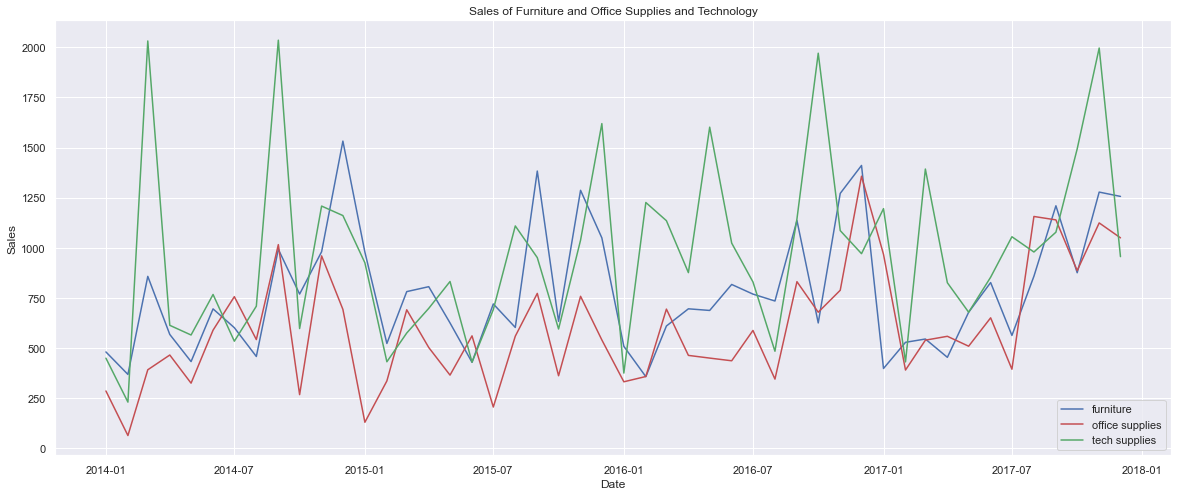

In [47]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.plot(store['Order Date'], store['Sales'], 'g-', label = 'tech supplies')


# store['Order Date'].plot, store['furniture_sales'].plot(color='red', label = 'furniture')
# store['Order Date'].plot, store['office_sales'].plot(color='blue', label = 'office supplies')
# store['Order Date'].plot, store['tech_sales'].plot(color='green', label = 'tech supplies')



plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies and Technology')
plt.legend();

In [48]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

off_sup = off_sup.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(off_sup)

tech = tech.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
tech_model = Prophet(interval_width=0.95)
tech_model.fit(tech)

16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:35 - cmdstanpy - INFO - Chain [1] start processing
16:04:35 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

tech_forecast = tech_model.make_future_dataframe(periods=36, freq='MS')
tech_forecast = tech_model.predict(tech_forecast)

### Furniture Forecast

<Figure size 1296x432 with 0 Axes>

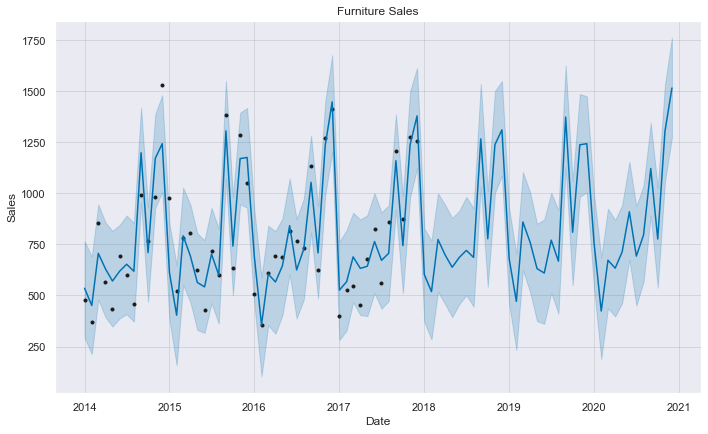

In [50]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');


### Office Supplies Forecast

<Figure size 1296x432 with 0 Axes>

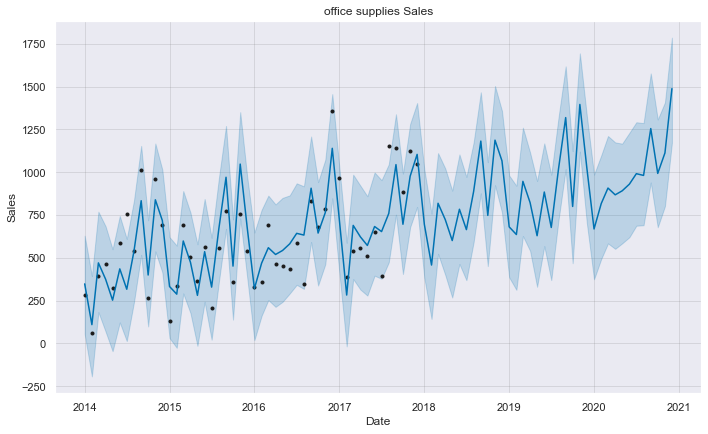

In [51]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('office supplies Sales');

### Technology Forecast

<Figure size 1296x432 with 0 Axes>

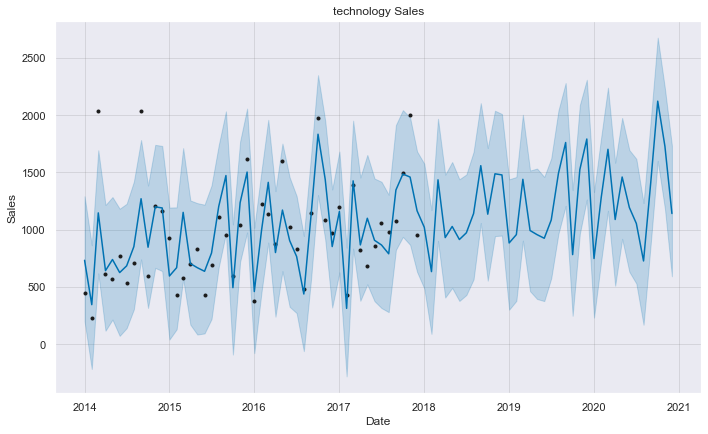

In [52]:
plt.figure(figsize=(18, 6))
tech_model.plot(tech_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('technology Sales');

In [53]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
tech_names = ['tech_%s' % column for column in tech_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_tech_forecast = tech_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
merge_tech_forecast.columns = tech_names

In [54]:
merge_furniture_forecast=merge_furniture_forecast.rename(columns={'furniture_ds':'Order_Date'})
merge_office_forecast=merge_office_forecast.rename(columns={'office_ds':'Order_Date'})
merge_tech_forecast=merge_tech_forecast.rename(columns={'tech_ds':'Order_Date'})

### Getting trend

In [55]:
forecast=merge_furniture_forecast.merge(merge_office_forecast,on='Order_Date').merge(merge_tech_forecast,on='Order_Date')
forecast.head()

,Order_Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,tech_additive_terms,tech_additive_terms_lower,tech_additive_terms_upper,tech_yearly,tech_yearly_lower,tech_yearly_upper,tech_multiplicative_terms,tech_multiplicative_terms_lower,tech_multiplicative_terms_upper,tech_yhat
0,2014-01-01,726.058109,292.840156,765.689028,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,0.0,0.0,0.0,731.791382
1,2014-02-01,727.494421,212.849909,690.681662,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,0.0,0.0,0.0,344.613664
2,2014-03-01,728.791734,480.177501,945.171220,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,181.796373,181.796373,181.796373,181.796373,181.796373,181.796373,0.0,0.0,0.0,1145.801199
3,2014-04-01,730.228046,393.869959,857.449295,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,0.0,0.0,0.0,641.606975
4,2014-05-01,731.618025,348.098757,816.465100,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,0.0,0.0,0.0,738.712044


In [56]:
forecast.columns

Index(['Order_Date', 'furniture_trend', 'furniture_yhat_lower',
       'furniture_yhat_upper', 'furniture_trend_lower',
       'furniture_trend_upper', 'furniture_additive_terms',
       'furniture_additive_terms_lower', 'furniture_additive_terms_upper',
       'furniture_yearly', 'furniture_yearly_lower', 'furniture_yearly_upper',
       'furniture_multiplicative_terms',
       'furniture_multiplicative_terms_lower',
       'furniture_multiplicative_terms_upper', 'furniture_yhat',
       'office_trend', 'office_yhat_lower', 'office_yhat_upper',
       'office_trend_lower', 'office_trend_upper', 'office_additive_terms',
       'office_additive_terms_lower', 'office_additive_terms_upper',
       'office_yearly', 'office_yearly_lower', 'office_yearly_upper',
       'office_multiplicative_terms', 'office_multiplicative_terms_lower',
       'office_multiplicative_terms_upper', 'office_yhat', 'tech_trend',
       'tech_yhat_lower', 'tech_yhat_upper', 'tech_trend_lower',
       'tech_trend_u

### Comparing all categories trends

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


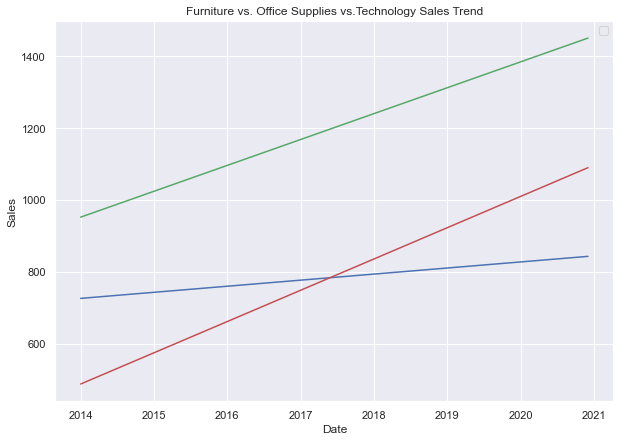

In [57]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Order_Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Order_Date'], forecast['office_trend'], 'r-')
plt.plot(forecast['Order_Date'], forecast['tech_trend'], 'g-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies vs.Technology Sales Trend');

### Visualizing Furniture vs. Office Supplies vs. Technology Time Series

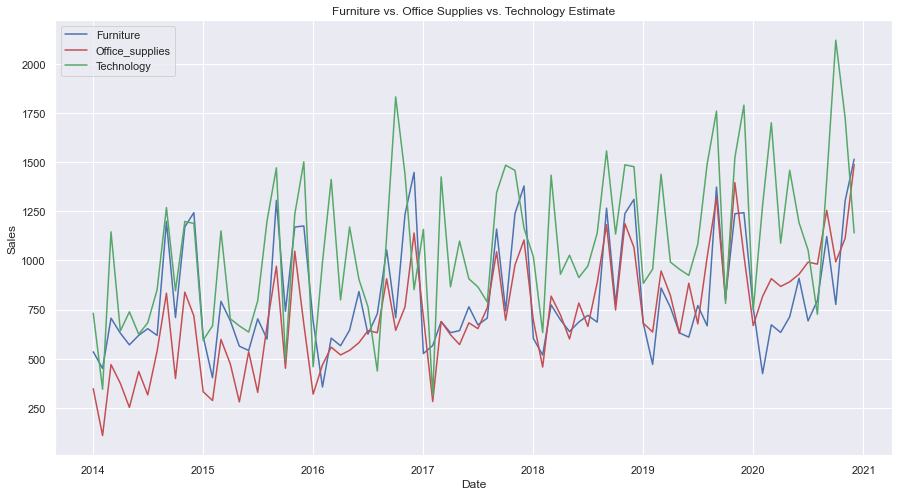

In [58]:
plt.figure(figsize=(15, 8))
plt.plot(forecast['Order_Date'], forecast['furniture_yhat'], 'b-',label='Furniture')
plt.plot(forecast['Order_Date'], forecast['office_yhat'], 'r-',label='Office_supplies')
plt.plot(forecast['Order_Date'], forecast['tech_yhat'], 'g-',label='Technology')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies vs. Technology Estimate');

### Trend and Pattern

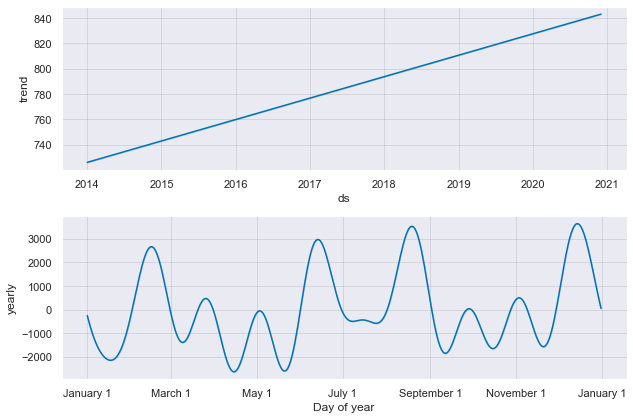

In [59]:
furniture_model.plot_components(furniture_forecast);

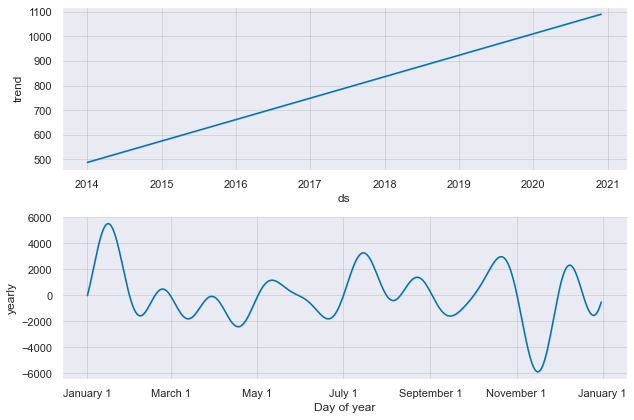

In [60]:
office_model.plot_components(office_forecast);

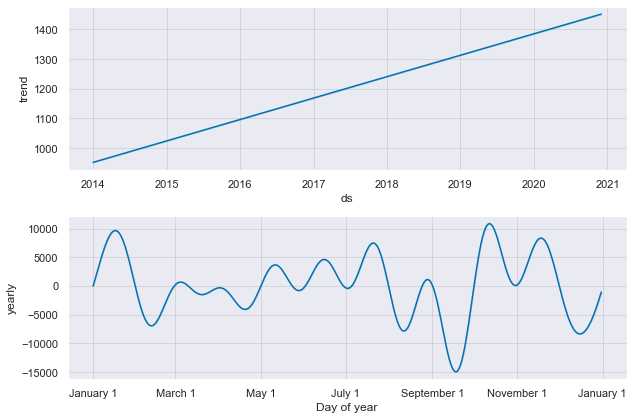

In [61]:
tech_model.plot_components(tech_forecast);

### Good to see that the sales for all three categories- furniture, office supplies and technology have been linearly increasing over time although office supplies' growth seems slightly stronger.

### furniture-The worst month is April,The best month is December 
### office supplies-The worst month for is February,the best month is November
### technology-The worst month is September,The best month is October

 ### As same we can now forecast the trend and pattern for Profit